# House Prices Model

* Load the **housing prices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

## Load Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# Load data from PostgreSQL database and print out
# observations
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, as we're only doing a single query
engine.dispose()

house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [2]:
# Convert street and overallqual to numerical variables
house_df['street_is_paved'] = np.where(house_df['street'] == 'Pave', 1, 0)
house_df['overallqual_above_6'] = np.where(house_df['overallqual'] > 6, 1, 0)

house_df[['id', 'street', 'street_is_paved', 'overallqual', 'overallqual_above_6']].head(25)

,id,street,street_is_paved,overallqual,overallqual_above_6
0,1,Pave,1,7,1
1,2,Pave,1,6,0
2,3,Pave,1,7,1
3,4,Pave,1,7,1
4,5,Pave,1,8,1
5,6,Pave,1,5,0
6,7,Pave,1,8,1
7,8,Pave,1,7,1
8,9,Pave,1,7,1
9,10,Pave,1,5,0


## Split data into train and test sets

In [3]:
# Y is the target variable
Y = house_df['saleprice']

# X is the feature set
X = house_df[['street_is_paved', 'overallqual_above_6', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea']]

# Split data into train and test sets using scikit-learn's
# train_test_split() method. The train_test_split() method
# uses the test_size parameter to decide on how much of the
# data will be split out as test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


## Build and train model using only the training set

In [4]:
X_train.head()

,street_is_paved,overallqual_above_6,lotarea,totalbsmtsf,grlivarea,garagearea
151,1,0,10356,969,969,440
262,1,1,9588,1482,2574,868
1037,1,1,9240,1055,2263,905
1183,1,0,10800,1120,1130,720
933,1,1,8487,1500,1500,570


In [5]:
# Add a contant to the model, the 'baseline' of
# the data in case all of your feature values are 0
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     477.6
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          2.62e-309
Time:                        10:48:02   Log-Likelihood:                -14099.
No. Observations:                1168   AIC:                         2.821e+04
Df Residuals:                    1161   BIC:                         2.825e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.827e+04   2

### Assess goodness of fit
F statistic=477.6; p-value=2.62e-309

* This means that the model is more useful in explaining house prices than an "empty" model (p-value less than 0.05).

R-squared=0.712; Adjusted R-squared=0.710

* This means that the model explains 71.0% of the variance in the house prices, leaving 29% unexplained.

AIC=2.821e+04; BIC=2.825e+04

* The AIC and BIC values seem large. Lower values are better.

The model is pretty good, but there is room for improvement since 29% of the variance is still unexplained and the AIC and BIC values could be reduced.

## Predict house prices in the test set

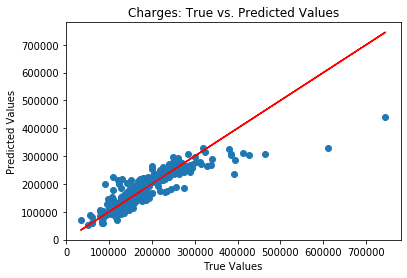

Mean absolute error of the prediction is: 25940.492869753914
Mean squared error of the prediction is: 1745918403.1182017
Root mean squared error of the prediction is: 41784.18843436117
Mean absolute percentage error of the prediction is: 14.549657734576227


In [6]:
# Make predictions by calling the predict() function
# Add constant to the model as it is best practice
X_test = sm.add_constant(X_test)

# Make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Charges: True vs. Predicted Values')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Evaluate performance of model

The model predicts house prices for homes between 0 and 350,000 dollars very well (as indicated by closeness of points to the red line). It also has a low MAPE of 14.5%, indicating that the error in predictions is pretty small in terms of the actual house prices.

Based on these metrics, the performance of the model is satisfactory. However, there is room for improvement, especially for homes above 350,000 dollars.

## Improve model in terms of predictive performance by adding or removing features

### Model 2

In [10]:
# Y is the target variable
Y = house_df['saleprice']

# X is the feature set
# Replace overallqual_above_6 dummy variable with overallqual
X = house_df[['street_is_paved', 'overallqual', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea']]

# Split data into train and test sets using scikit-learn's
# train_test_split() method. The train_test_split() method
# uses the test_size parameter to decide on how much of the
# data will be split out as test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}\n".format(X_test.shape[0]))

# Add a contant to the model, the 'baseline' of
# the data in case all of your feature values are 0
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print summary results
print(results.summary())

The number of observations in training set is 1168
The number of observations in test set is 292

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     616.8
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:50:23   Log-Likelihood:                -13989.
No. Observations:                1168   AIC:                         2.799e+04
Df Residuals:                    1161   BIC:                         2.803e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

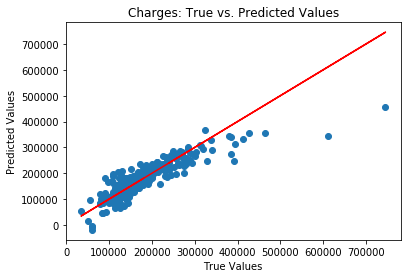

Mean absolute error of the prediction is: 25815.88738922489
Mean squared error of the prediction is: 1578789775.5435922
Root mean squared error of the prediction is: 39733.987662246946
Mean absolute percentage error of the prediction is: 15.959276591251353


In [11]:
# Make predictions by calling the predict() function
# Add constant to the model as it is best practice
X_test = sm.add_constant(X_test)

# Make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Charges: True vs. Predicted Values')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Evaluate performance of model
Adjusted R-squared improved from 0.710 to 0.760. AIC improved from 2.821e+04 to 2.799e+04. BIC improved from 2.825e+04 to 2.803e+04.

The test set performance of this model is better than the previous one with respect to three of the four metrics, namely MAE, MSE, and RMSE. MAPE is slightly higher for this model, but this is likely due to the poorer prediction performance for homes with house prices close to 0.

Like the first model, this model does a poor job of predicting the price of homes with true values above 350,000 dollars.

### Model 3

In [13]:
# Y is the target variable
Y = house_df['saleprice']

# X is the feature set
# Replace overallqual_above_6 dummy variable with overallqual
# Add garagecars variable to feature set
X = house_df[['street_is_paved', 'overallqual', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea', 'garagecars']]

# Split data into train and test sets using scikit-learn's
# train_test_split() method. The train_test_split() method
# uses the test_size parameter to decide on how much of the
# data will be split out as test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}\n".format(X_test.shape[0]))

# Add a contant to the model, the 'baseline' of
# the data in case all of your feature values are 0
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print summary results
print(results.summary())

The number of observations in training set is 1168
The number of observations in test set is 292

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     539.7
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:01:16   Log-Likelihood:                -13980.
No. Observations:                1168   AIC:                         2.798e+04
Df Residuals:                    1160   BIC:                         2.802e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

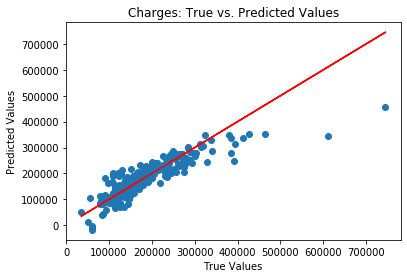

Mean absolute error of the prediction is: 25440.266499110032
Mean squared error of the prediction is: 1555763588.6749334
Root mean squared error of the prediction is: 39443.169100300925
Mean absolute percentage error of the prediction is: 15.70975517527824


In [14]:
# Make predictions by calling the predict() function
# Add constant to the model as it is best practice
X_test = sm.add_constant(X_test)

# Make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Charges: True vs. Predicted Values')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Evaluate performance of model
Adjusted R-squared improved from 0.760 to 0.764. AIC improved from 2.799e+04 to 2.798e+04. BIC improved from 2.803e+04 to 2.802e+04.

The test set performance of this model is better than the previous one with respect to all four metrics, namely MAE, MSE, RMSE, and MAPE. However, MAPE is still slightly higher for this model than it is for model 1.

Like the previous models, this model still does a poor job of predicting the price of homes with true values above 350,000 dollars.

### Model 4

In [22]:
# Y is the target variable
Y = house_df['saleprice']

# X is the feature set
# Replace overallqual_above_6 dummy variable with overallqual
# Add garagecars and mssubclass variables to feature set
X = house_df[['street_is_paved', 'overallqual', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea', 'garagecars', 'mssubclass']]

# Split data into train and test sets using scikit-learn's
# train_test_split() method. The train_test_split() method
# uses the test_size parameter to decide on how much of the
# data will be split out as test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}\n".format(X_test.shape[0]))

# Add a contant to the model, the 'baseline' of
# the data in case all of your feature values are 0
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print summary results
print(results.summary())

The number of observations in training set is 1168
The number of observations in test set is 292

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.1
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:09:03   Log-Likelihood:                -13970.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1159   BIC:                         2.800e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

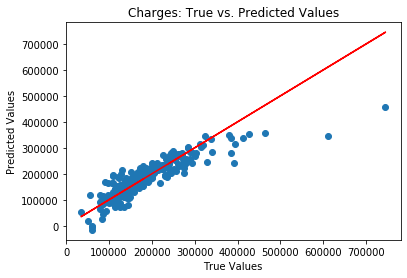

Mean absolute error of the prediction is: 25110.187416457844
Mean squared error of the prediction is: 1519303013.291384
Root mean squared error of the prediction is: 38978.23768837406
Mean absolute percentage error of the prediction is: 15.517698697706267


In [23]:
# Make predictions by calling the predict() function
# Add constant to the model as it is best practice
X_test = sm.add_constant(X_test)

# Make predictions
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Charges: True vs. Predicted Values')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Evaluate performance of model
Adjusted R-squared improved from 0.764 to 0.767. AIC improved from 2.798e+04 to 2.796e+04. BIC improved from 2.802e+04 to 2.800e+04.

The test set performance of this model is better than the previous one with respect to all four metrics, namely MAE, MSE, RMSE, and MAPE. However, MAPE is still slightly higher for this model than it is for model 1.

Like the previous models, this model still does a poor job of predicting the price of homes with true values above 350,000 dollars.